In [21]:
import warnings
warnings.simplefilter("ignore", UserWarning)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, balanced_accuracy_score, roc_auc_score
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks 
from imblearn.under_sampling import NearMiss
import numpy as np
import math
from sklearn.metrics import roc_curve,auc


In [22]:
df = pd.read_csv("fetal_health.csv")

df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [23]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [24]:
miss_values = df.columns[df.isnull().any()]
df[miss_values].isnull().sum()

Series([], dtype: float64)

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

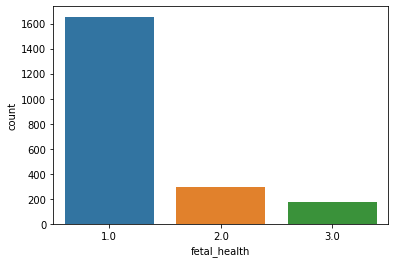

In [25]:
sns.countplot(x='fetal_health', data=df)

df['fetal_health'].value_counts()

<AxesSubplot:xlabel='fetal_health', ylabel='baseline value'>

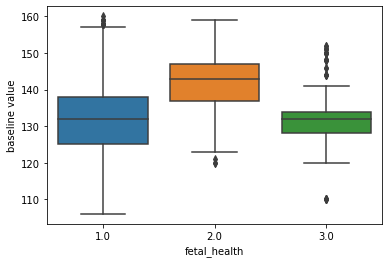

In [26]:
#for i, column in enumerate(df.columns):
    #sns.boxplot(x='fetal_health', y=column, data=df)
    #plt.title(column)
    #plt.show()
    
sns.boxplot(x='fetal_health', y='baseline value', data=df)
    #plt.title(column)

Text(0.5, 1.0, 'Correlation Matrix')

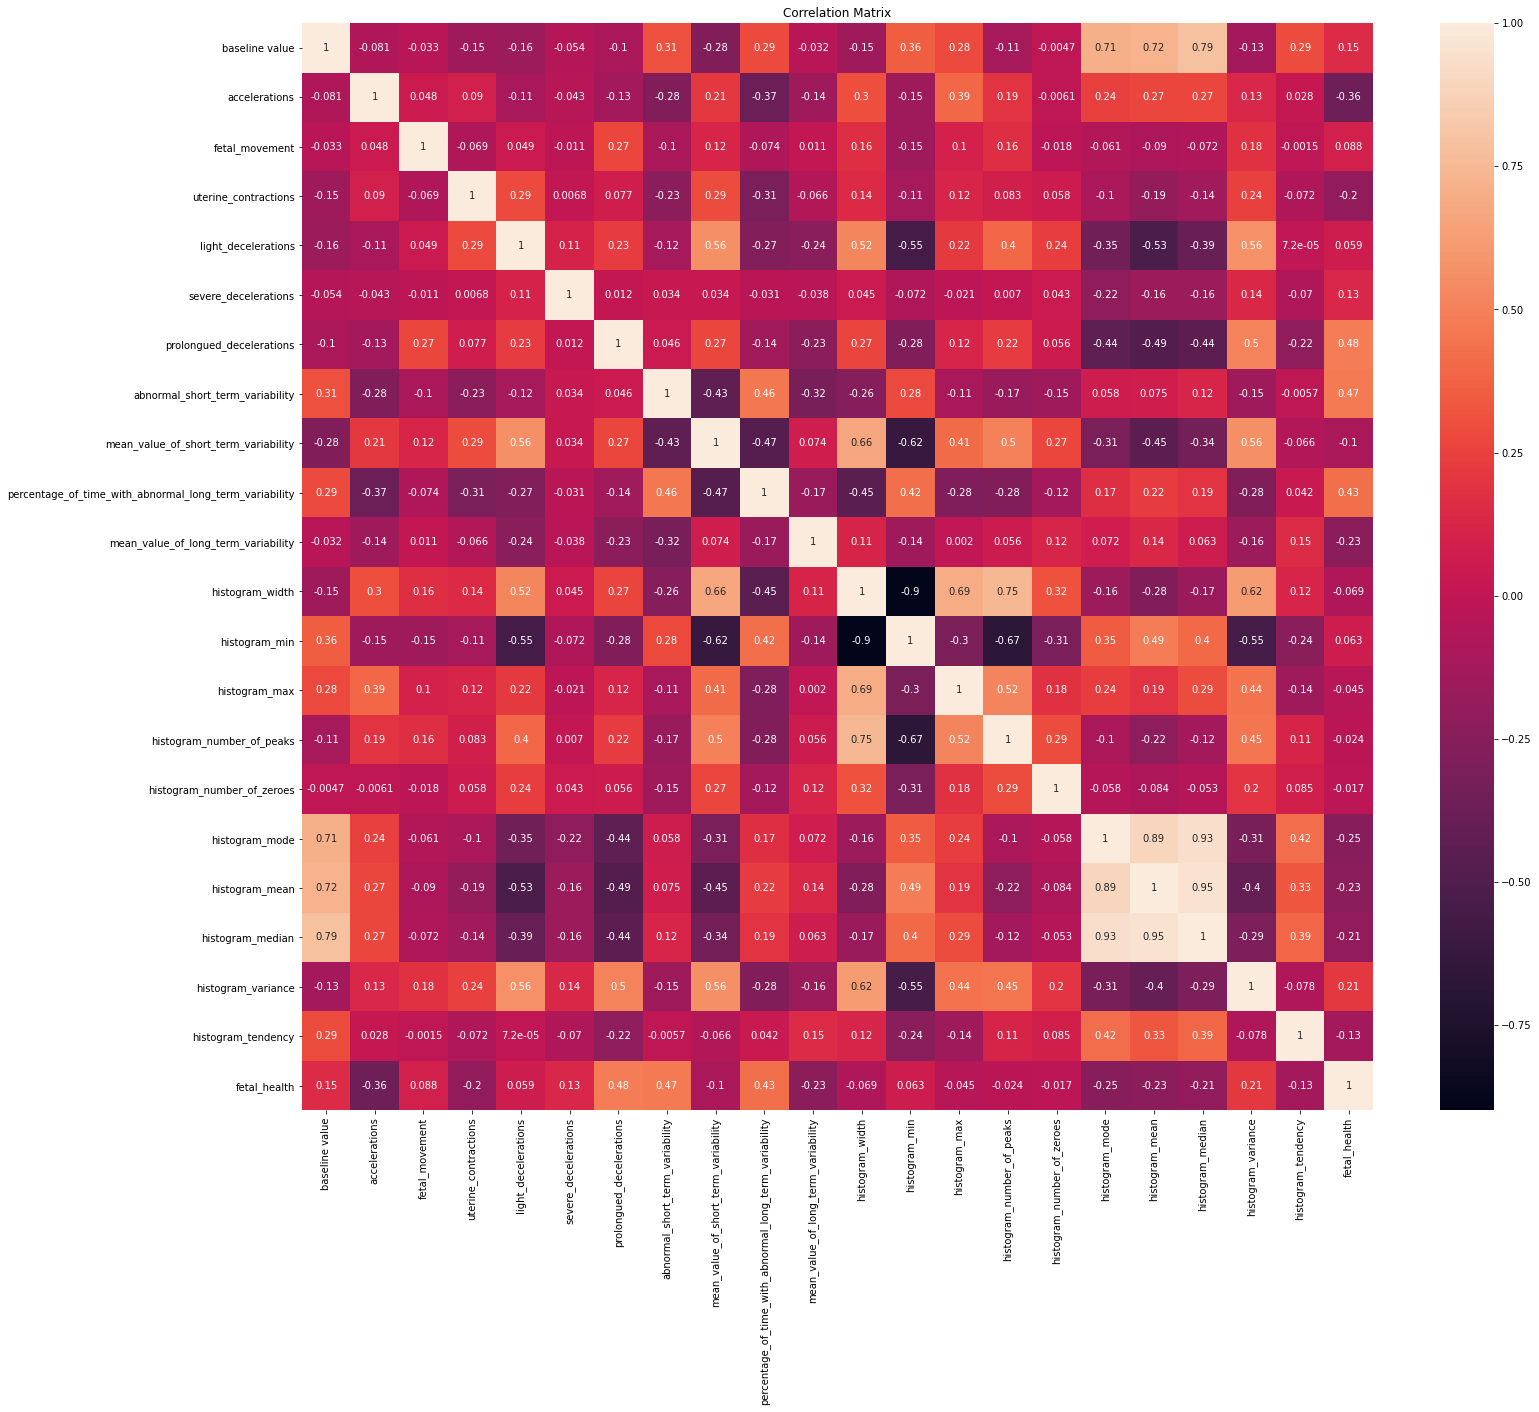

In [27]:
corr = df.corr()
plt.figure(figsize=(24, 20))
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix")

In [28]:
X = df.drop(["fetal_health"],axis=1)
Y = df["fetal_health"]

#Step by Step "Fetal Health" Prediction-Detailed - ekshghsh gia standard scaler
std_scale = StandardScaler()
X_sc = std_scale.fit_transform(X)


X_train, X_test, y_train,y_test = train_test_split(X_sc, Y, test_size=0.25, random_state=42)
print("There are total "+str(len(X_train))+" rows in training dataset")
print("There are total "+str(len(X_test))+" rows in test dataset")

There are total 1594 rows in training dataset
There are total 532 rows in test dataset


In [29]:
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

tl = TomekLinks()
X_train_tl, y_train_tl = tl.fit_resample(X_train, y_train)

nm = NearMiss(version = 1)
X_train_nm, y_train_nm = nm.fit_resample(X_train, y_train)
nm2 = NearMiss(version = 2)
X_train_nm2, y_train_nm2 = nm2.fit_resample(X_train, y_train)
nm3 = NearMiss(version = 3)
X_train_nm3, y_train_nm3 = nm3.fit_resample(X_train, y_train)

In [30]:
def evaluate_model(clf, X_test, y_test, model_name, oversample_type):
  print('--------------------------------------------')
  print('Model ', model_name)
  print('Data Type ', oversample_type)
  y_pred = clf.predict(X_test)

  f1 = f1_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  precision = precision_score(y_test, y_pred, average='weighted')
  print(classification_report(y_test, y_pred))
  balanced = balanced_accuracy_score(y_test, y_pred)

  f1= round(f1,2)
  recall= round(recall,2)
  precision= round(precision,2)
  balanced= round(balanced,2)
  


  print("F1 Score",f1)
  print("Recall",recall)
  print("Precision", precision)
  print("Balanced Accuracy Score", balanced)
  roc=0
  if ( model_name == 'DecisionTrees' or model_name == 'RandomForest' or model_name == 'AdaBoostClassifier') :
    y_prob = clf.predict_proba(X_test)
    roc = roc_auc_score(y_test, y_prob, multi_class="ovo",  average="macro")
    print("ROC", roc)
    roc= round(roc,2)

    
  
  
  
  
  return [model_name, oversample_type, f1, recall, precision, balanced, roc]

In [31]:
models = {
    'DecisionTrees': DecisionTreeClassifier(random_state=42),
    'RandomForest':RandomForestClassifier(random_state=42),
    'LinearSVC':LinearSVC(random_state=0),
    'AdaBoostClassifier':AdaBoostClassifier(random_state=42),
    'SGD':SGDClassifier()
}

In [32]:
sampled_data = {
    'Default':[X_train, y_train],
    'SMOTE':[X_train_sm, y_train_sm], 
    'Tomek Links':[X_train_tl, y_train_tl],
    'Near Miss 1':[X_train_nm, y_train_nm],
    'Near Miss 2':[X_train_nm2, y_train_nm2],
    'Near Miss 3':[X_train_nm3, y_train_nm3]

}

In [33]:
final_output = []
for model_k, model_clf in models.items():
  for data_type, data in sampled_data.items():
    model_clf.fit(data[0], data[1])
    final_output.append(evaluate_model(model_clf, X_test, y_test, model_k, data_type))

final_df = pd.DataFrame(final_output, columns=['Model', 'DataType', 'F1', 'Recall','Precision','Balanced Accuracy', 'ROC'])
final_df

--------------------------------------------
Model  DecisionTrees
Data Type  Default
              precision    recall  f1-score   support

         1.0       0.97      0.95      0.96       413
         2.0       0.80      0.85      0.83        82
         3.0       0.92      0.95      0.93        37

    accuracy                           0.94       532
   macro avg       0.90      0.92      0.91       532
weighted avg       0.94      0.94      0.94       532

F1 Score 0.94
Recall 0.94
Precision 0.94
Balanced Accuracy Score 0.92
ROC 0.9383999099790751
--------------------------------------------
Model  DecisionTrees
Data Type  SMOTE
              precision    recall  f1-score   support

         1.0       0.97      0.94      0.96       413
         2.0       0.77      0.87      0.82        82
         3.0       0.85      0.95      0.90        37

    accuracy                           0.93       532
   macro avg       0.87      0.92      0.89       532
weighted avg       0.94      0.9

Data Type  Near Miss 1
              precision    recall  f1-score   support

         1.0       0.97      0.84      0.90       413
         2.0       0.62      0.74      0.68        82
         3.0       0.44      0.92      0.60        37

    accuracy                           0.83       532
   macro avg       0.68      0.83      0.72       532
weighted avg       0.88      0.83      0.84       532

F1 Score 0.84
Recall 0.83
Precision 0.88
Balanced Accuracy Score 0.83
--------------------------------------------
Model  LinearSVC
Data Type  Near Miss 2
              precision    recall  f1-score   support

         1.0       0.99      0.70      0.82       413
         2.0       0.36      0.80      0.50        82
         3.0       0.54      0.81      0.65        37

    accuracy                           0.73       532
   macro avg       0.63      0.77      0.66       532
weighted avg       0.86      0.73      0.76       532

F1 Score 0.76
Recall 0.73
Precision 0.86
Balanced Accuracy S

,Model,DataType,F1,Recall,Precision,Balanced Accuracy,ROC
0,DecisionTrees,Default,0.94,0.94,0.94,0.92,0.94
1,DecisionTrees,SMOTE,0.93,0.93,0.94,0.92,0.94
2,DecisionTrees,Tomek Links,0.93,0.92,0.93,0.91,0.93
3,DecisionTrees,Near Miss 1,0.75,0.71,0.86,0.78,0.84
4,DecisionTrees,Near Miss 2,0.56,0.53,0.85,0.77,0.82
5,DecisionTrees,Near Miss 3,0.77,0.75,0.83,0.78,0.84
6,RandomForest,Default,0.95,0.95,0.95,0.90,0.99
7,RandomForest,SMOTE,0.95,0.95,0.95,0.93,0.99
8,RandomForest,Tomek Links,0.94,0.95,0.94,0.90,0.99
9,RandomForest,Near Miss 1,0.78,0.73,0.89,0.80,0.95


In [34]:
def grouped_bar_imbalance(loss_arr):
	methods = ['Default', 'Tomek Links', 'SMOTE', 'Near Miss1']
	labels = ['Random Forest', 'Linear SVC', 'AdaBoostClassifier', 'DecisionTrees', 'SGD']

	width = 0.8 / len(loss_arr)
	Pos = np.array(range(len(loss_arr[0])))
	fig, ax = plt.subplots(figsize=(12, 8))
	bars = []
	for i in range(len(loss_arr)):
		bars.append(ax.bar(Pos + i * width, loss_arr[i], width=width, label=methods[i]))

	ax.set_xticks(Pos + width / 4)
	ax.set_xticklabels(labels)
	ax.bar_label(bars[0], padding=1)
	ax.bar_label(bars[1], padding=1)
	ax.bar_label(bars[2], padding=1)
	ax.bar_label(bars[3], padding=1)
	ax.legend()
	fig.tight_layout()
	return


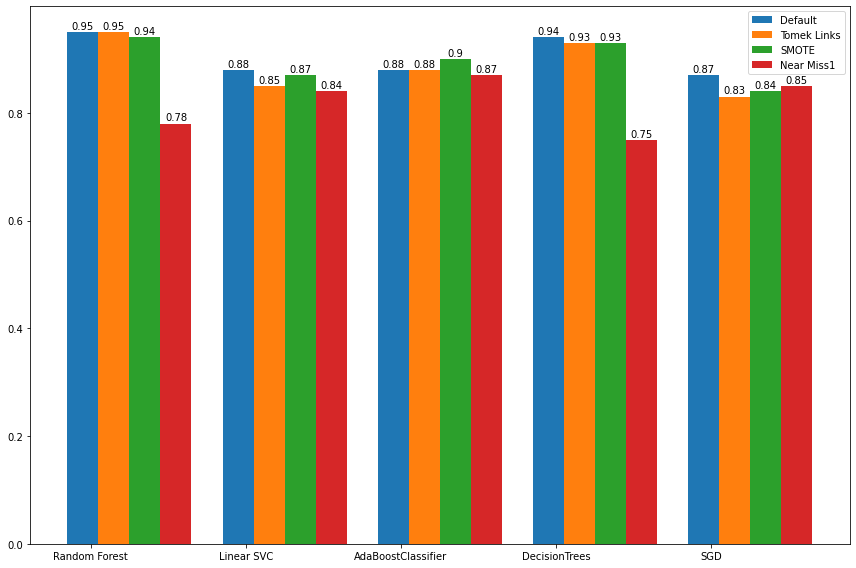

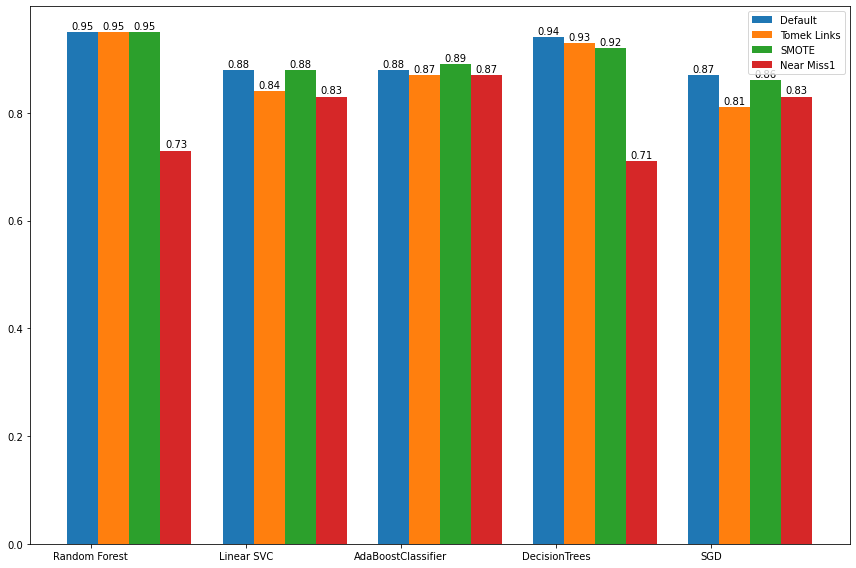

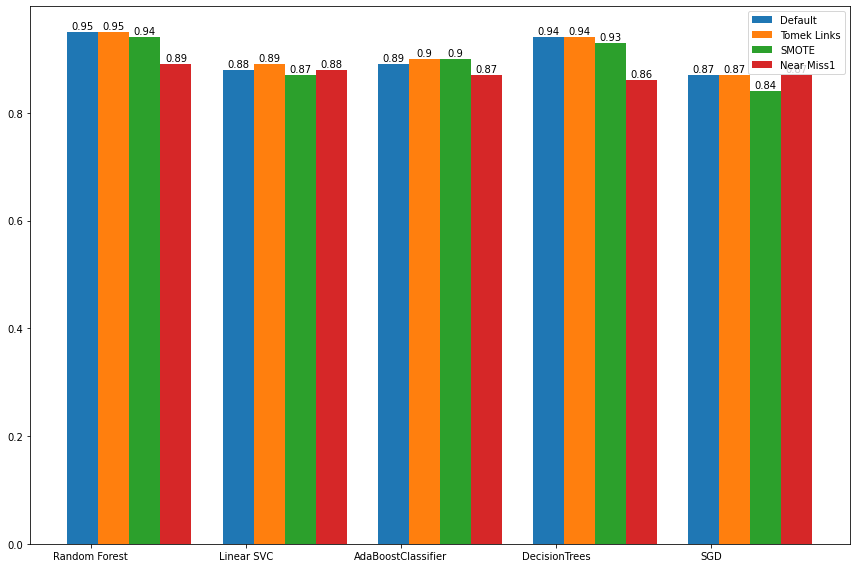

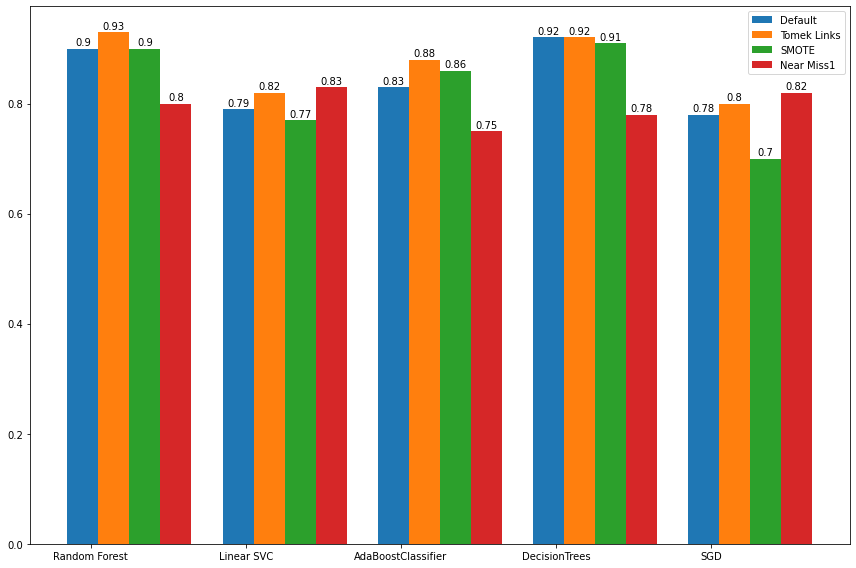

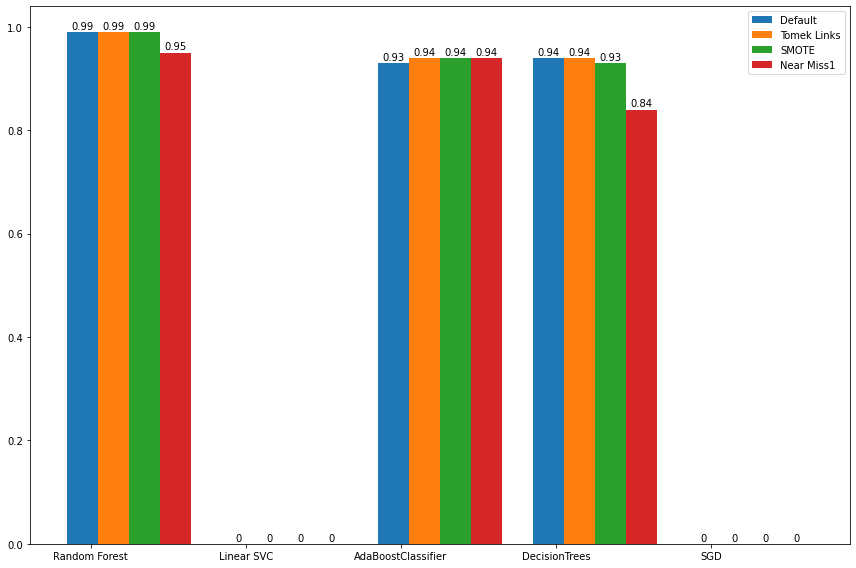

In [35]:
for j in range(2,7):
	rf_f1 = []
	for i in range(6, 10):
	    rf_f1.append(final_output[i][j])

	svc_f1 = []
	for i in range(12, 16):
		svc_f1.append(final_output[i][j])

	ada_f1 = []
	for i in range(18, 22):
		ada_f1.append(final_output[i][j])

	dts_f1 = []
	for i in range(0,4):
		dts_f1.append(final_output[i][j])

	sgd_f1 = []
	for i in range(24,28):
		sgd_f1.append(final_output[i][j])

	df2 = pd.DataFrame(np.array([rf_f1, svc_f1, ada_f1, dts_f1, sgd_f1]))
	df2 = df2.T

	tolist = df2.values.tolist()
	#print(tolist)
	#print(len(tolist))
	grouped_bar_imbalance(tolist)